In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ufos = pd.read_csv("ufo-1.csv")

C:\Users\Romka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85904 entries, 0 to 85903
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            85904 non-null  int64  
 1   Unnamed: 0.1          85904 non-null  int64  
 2   datetime              85904 non-null  object 
 3   city                  85893 non-null  object 
 4   state                 80270 non-null  object 
 5   country               85904 non-null  object 
 6   shape                 83293 non-null  object 
 7   duration (seconds)    85903 non-null  object 
 8   duration (hours/min)  83356 non-null  object 
 9   comments              85874 non-null  object 
 10  date posted           85904 non-null  object 
 11  latitude              85904 non-null  object 
 12  longitude             85904 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 8.5+ MB


In [4]:
ufos.head()

,Unnamed: 0,Unnamed: 0.1,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,0,0,1949-10-10 20:30:00,san marcos,tx,United States,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,1,1,1949-10-10 21:00:00,lackland afb,tx,United States,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,2,2,1955-10-10 17:00:00,chester,NaN,United Kingdom,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,3,3,1956-10-10 21:00:00,edna,tx,United States,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,4,4,1960-10-10 20:00:00,kaneohe,hi,United States,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [5]:
ufos.drop(ufos.columns[0], axis=1, inplace=True)

In [6]:
ufos.drop(ufos.columns[0], axis=1, inplace=True)

In [7]:
ufos.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,United States,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,United States,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,1955-10-10 17:00:00,chester,NaN,United Kingdom,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,United States,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,United States,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [19]:
ufos["datetime"] = pd.to_datetime(ufos['datetime'])
ufos["year"] = ufos["datetime"].dt.year

## 3.2. UFOS SHAPES

In [8]:
ufos["shape"].dtype

dtype('O')

In [9]:
ufos["shape"] = pd.Series(ufos["shape"], dtype="string")

In [13]:
ufos["shape"].value_counts()

light        17451
triangle      8312
circle        8181
fireball      6408
unknown       6111
other         6043
disk          5739
sphere        5592
oval          3974
formation     2591
cigar         2167
changing      2071
flash         1437
rectangle     1384
cylinder      1337
diamond       1263
chevron        989
egg            819
teardrop       795
cone           354
cross          259
delta            8
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
changed          1
Name: shape, dtype: Int64

<AxesSubplot:xlabel='shape', ylabel='count'>

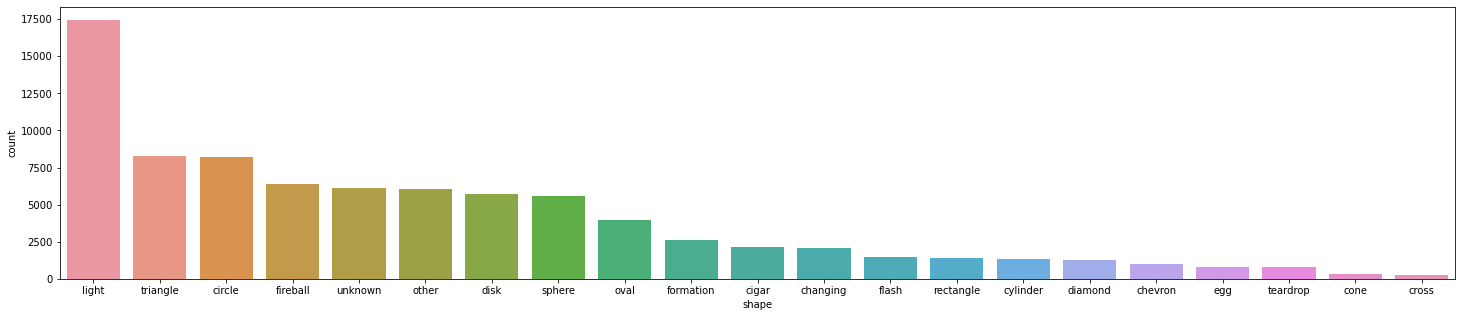

In [16]:
plt.figure(figsize=(25,5))
sns.countplot(data=ufos, x="shape", order=ufos["shape"].value_counts()[:21].index)

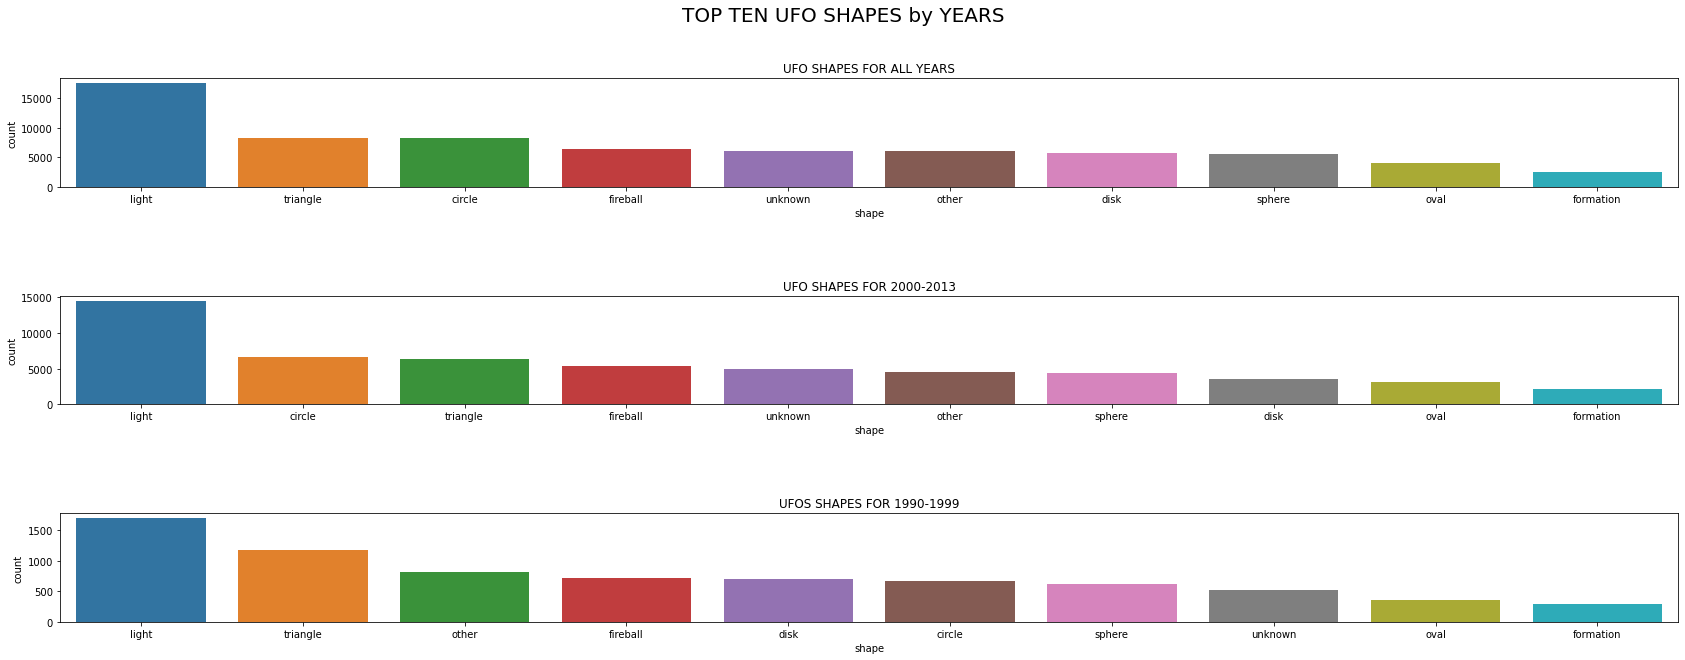

In [21]:
fig, axes = plt.subplots(nrows=3, figsize=(29,10))

sns.countplot(ax=axes[0], data=ufos, x="shape", order=ufos["shape"].value_counts()[:10].index)
axes[0].set_title("UFO SHAPES FOR ALL YEARS")

sns.countplot(ax=axes[1], x="shape", data=ufos[ufos["year"].isin(list(range(2000,2014)))], order=ufos["shape"][ufos["year"].isin(list(range(2000,2014)))].value_counts()[:10].index)
axes[1].set_title("UFO SHAPES FOR 2000-2013")

sns.countplot(ax = axes[2], data=ufos[ufos["year"].isin(list(range(1990,2000)))], x="shape", order=ufos["shape"][ufos["year"].isin(list(range(1990,2000)))].value_counts()[:10].index)
axes[2].set_title("UFOS SHAPES FOR 1990-1999")

fig.suptitle("TOP TEN UFO SHAPES by YEARS", fontsize=20)
fig.subplots_adjust(wspace=1, hspace=1)


### - We can say light shape generally keeps its place as most seen shape.
### - We can say that circle has upwards trend on the contrary triangle.
### - We can say that fireball has also linear trend.

## 3.3. COMMENT ANALYSIS

In [37]:
nuclear = 0
for i in range(0,len(ufos)):
    if "nuclear" in str(ufos["comments"].iloc[i]).lower():
        nuclear+=1

In [38]:
nuclear

52

In [39]:
government = 0
for i in range(0, len(ufos)):
    if "government" in str(ufos["comments"].iloc[i]).lower():
        government+=1

In [40]:
government

33

In [41]:
military = 0
for i in range(0, len(ufos)):
    if "military" in str(ufos["comments"].iloc[i]).lower():
        military+=1

In [42]:
military

381

### - We can say that 52 comments contain "nuclear", 33 comments contain "goverment" and 381 comments contain "military"

In [45]:
dict_weat = {"sunny":0, "cloudy":0, "snowy":0, "rainy":0, "foggy":0, "clear":0, "bright":0,
            "overcast":0, "cloudless":0}

for adj in dict_weat.keys():
    for i in range(0, len(ufos)):
        if adj in str(ufos["comments"].iloc[i]).lower():
            dict_weat[adj] += 1
       

<BarContainer object of 9 artists>

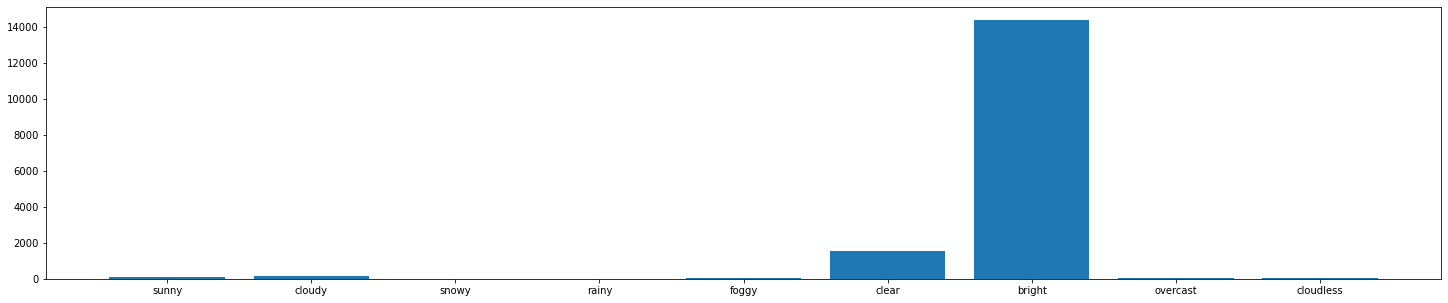

In [50]:
weat_state = list(dict_weat.keys())
occurence = list(dict_weat.values())
plt.figure(figsize=(25,5))
plt.bar(weat_state, occurence)

In [52]:
dict_weat

{'sunny': 126,
 'cloudy': 130,
 'snowy': 6,
 'rainy': 7,
 'foggy': 19,
 'clear': 1532,
 'bright': 14405,
 'overcast': 64,
 'cloudless': 64}

### - We can say that "bright" and "clear" adjectives are occured at most between most used weather adjectives.